In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
from matplotlib import pyplot as plt # data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [4]:
mdf = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")

## **Knowing the Data:~**

In [5]:
mdf

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [6]:
mdf.sample(10)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
1757673,1757673,e,4.30,f,t,n,f,d,NaN,o,...,NaN,t,w,NaN,NaN,f,f,NaN,d,w
1139953,1139953,p,3.59,b,h,n,f,NaN,NaN,n,...,NaN,NaN,w,NaN,NaN,t,NaN,k,g,a
2685088,2685088,p,4.30,b,t,l,f,s,c,u,...,NaN,y,w,NaN,NaN,t,e,u,d,u
471355,471355,e,5.79,c,h,n,f,e,NaN,w,...,NaN,s,n,u,w,f,f,NaN,d,a
415341,415341,e,14.55,f,y,w,f,NaN,NaN,w,...,s,NaN,n,NaN,NaN,t,m,NaN,d,a
2430287,2430287,e,6.85,s,NaN,n,f,d,c,w,...,NaN,s,w,NaN,NaN,f,f,NaN,l,u
310949,310949,p,1.90,f,i,k,f,a,NaN,p,...,NaN,NaN,w,NaN,NaN,f,f,p,g,u
2711745,2711745,e,2.56,f,y,n,f,a,d,p,...,NaN,i,n,NaN,NaN,f,f,NaN,l,a
1701225,1701225,e,3.02,s,d,p,t,d,c,p,...,NaN,NaN,g,NaN,NaN,f,f,NaN,d,a
461011,461011,e,10.57,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,l,a


In [7]:
mdf.set_index("id", inplace=True)

In [8]:
mdf.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [9]:
mdf.columns = mdf.columns.str.replace("-", "_", regex=True)
mdf.rename(columns={"class":"e_label"}, inplace=True)

In [10]:
mdf.isnull().sum()

e_label                       0
cap_diameter                  4
cap_shape                    40
cap_surface              671023
cap_color                    12
does_bruise_or_bleed          8
gill_attachment          523936
gill_spacing            1258435
gill_color                   57
stem_height                   0
stem_width                    0
stem_root               2757023
stem_surface            1980861
stem_color                   38
veil_type               2957493
veil_color              2740947
has_ring                     24
ring_type                128880
spore_print_color       2849682
habitat                      45
season                        0
dtype: int64

In [11]:
mdf[mdf.duplicated()]

,e_label,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,


#### //- SUMMARY from above:
* ##### The dataset has **22 columns**, with "id" column set as index. So effectively 21.
* ##### There are **3116945 rows. No duplicate rows** in the dataset.
* ##### Some of the columns have **a lot of null** values.
* ##### **Target column name is "e_label"** meaning Edibility-label.

### **Details of the Numerical Columns:~**

In [12]:
mdf.describe()

,cap_diameter,stem_height,stem_width
count,3.116941e+06,3.116945e+06,3.116945e+06
mean,6.309848e+00,6.348333e+00,1.115379e+01
std,4.657931e+00,2.699755e+00,8.095477e+00
min,3.000000e-02,0.000000e+00,0.000000e+00
25%,3.320000e+00,4.670000e+00,4.970000e+00
50%,5.750000e+00,5.880000e+00,9.650000e+00
75%,8.240000e+00,7.410000e+00,1.563000e+01
max,8.067000e+01,8.872000e+01,1.029000e+02


Text(0.5, 1.0, 'Stem Width')

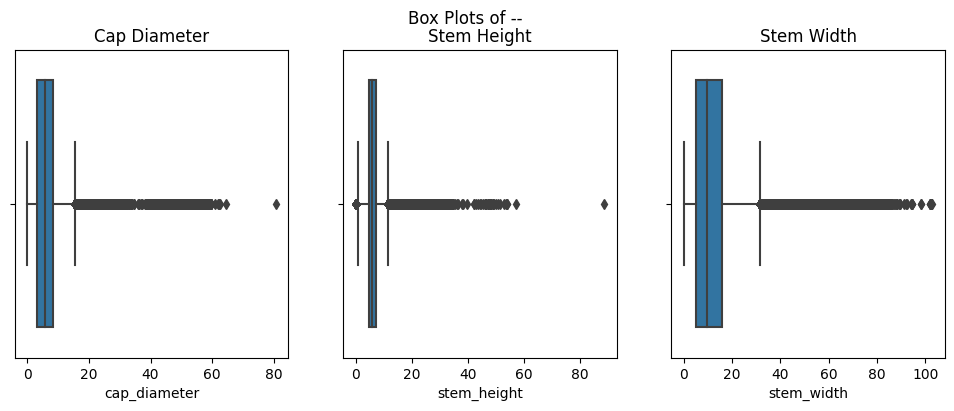

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle('Box Plots of --')

# cap_diameter
sns.boxplot(ax=axes[0], x=mdf["cap_diameter"])
axes[0].set_title("Cap Diameter")

# stem_height
sns.boxplot(ax=axes[1], x=mdf["stem_height"])
axes[1].set_title("Stem Height")

# stem_width
sns.boxplot(ax=axes[2], x=mdf["stem_width"])
axes[2].set_title("Stem Width")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Stem Width')

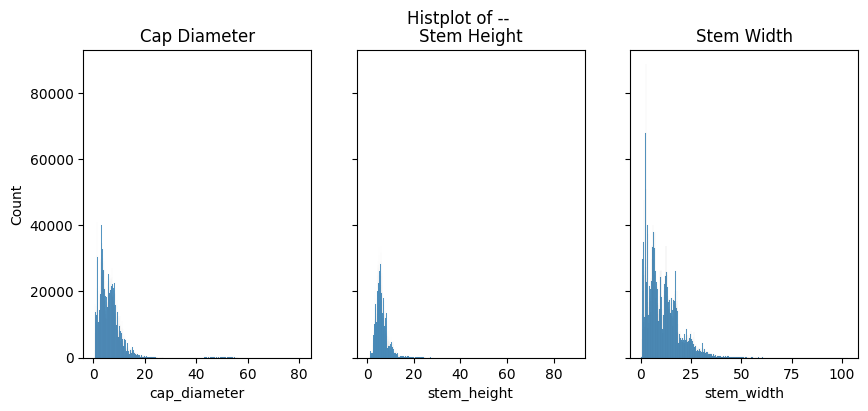

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
fig.suptitle('Histplot of --')

# cap_diameter
sns.histplot(x=mdf["cap_diameter"], ax=axes[0])
axes[0].set_title("Cap Diameter")

# stem_height
sns.histplot(x=mdf["stem_height"], ax=axes[1])
axes[1].set_title("Stem Height")

# stem_width
sns.histplot(x=mdf["stem_width"], ax=axes[2])
axes[2].set_title("Stem Width")

### **Details of the Categorical Columns:~**

In [15]:
mdf.describe(include="object")

,e_label,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
count,3116945,3116905,2445922,3116933,3116937,2593009,1858510,3116888,359922,1136084,3116907,159452,375998,3116921,2988065,267263,3116900,3116945
unique,2,74,83,78,26,78,48,63,38,60,59,22,24,23,40,32,52,4
top,p,x,t,n,f,a,c,w,b,s,w,u,w,f,f,k,d,a
freq,1705396,1436026,460777,1359542,2569743,646034,1331054,931538,165801,327610,1196637,159373,279070,2368820,2477170,107310,2177573,1543321


e_label
p    1705396
e    1411549
Name: count, dtype: int64

<Axes: title={'center': 'Proportion of e & p'}>

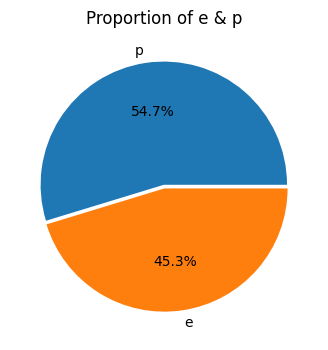

In [16]:
display(mdf.e_label.value_counts())
mdf.e_label.value_counts().plot(kind="pie", title="Proportion of e & p", ylabel="",
                                y=mdf.e_label.value_counts(), figsize=(4,4),
                                autopct="%1.01f%%", explode=(0.01,0.02))

In [17]:
mdf.shape

(3116945, 21)

In [18]:
mdf.cap_shape.value_counts()

cap_shape
x        1436026
f         676238
s         365146
b         318646
o         108835
          ...   
12.62          1
5.15           1
19.04          1
49.21          1
19.06          1
Name: count, Length: 74, dtype: int64

In [19]:
mdf.cap_shape.unique()

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', nan, 'w', 'k',
       'l', '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
       '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
       '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
       '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
       'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
       '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
       '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
       '6.53', '19.06'], dtype=object)

##### In cap_shape there are some garbage values, probably are wringly imputed. Let's check how much data are such.

In [20]:
mdf[mdf.cap_shape.isin(list("fxpbocsdenwkltgzaruyimh")+[np.nan])].shape

(3116890, 21)

##### So there are **(3116945-3116890) = 55** such data. We can remove these.

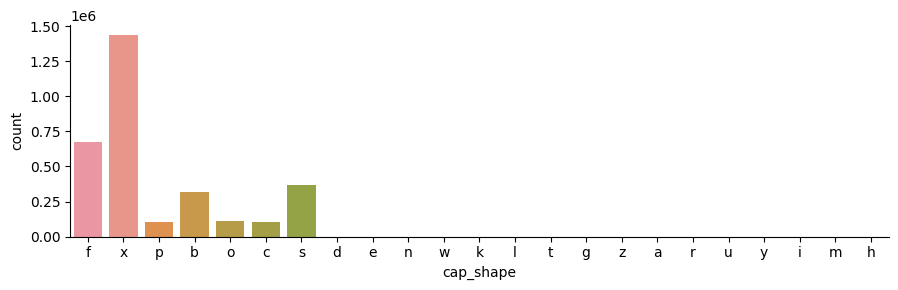

In [21]:
mdf = mdf[mdf.cap_shape.isin(list("fxpbocsdenwkltgzaruyimh")+[np.nan])]
sns.catplot(mdf, kind="count", x ="cap_shape", height=3, aspect=3)

##### Proportion wise only 7 entries like **f,x,p,b,o,c,s have visible spread over the cap_shape series.**

In [22]:
mdf.shape

(3116890, 21)

In [23]:
mdf.cap_surface.value_counts()

cap_surface
t        460771
s        384966
y        327816
h        284457
g        263720
          ...  
1.42          1
has h         1
10.83         1
8.96          1
0.87          1
Name: count, Length: 83, dtype: int64

##### The same is for cap_surface too. So have done the same operation and dropped those garbage entries.

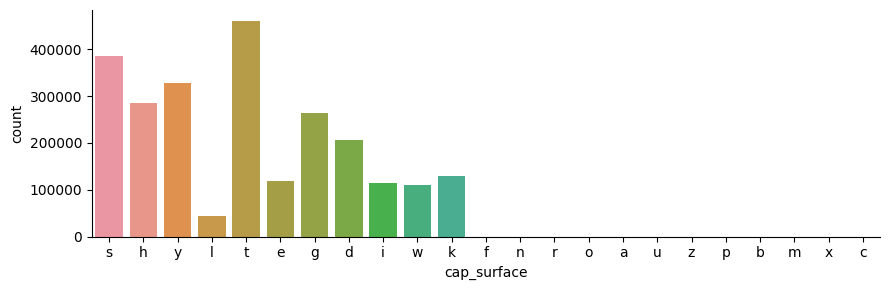

In [24]:
mdf = mdf[mdf.cap_surface.isin(list("shyltegdiwkfnroauzpbmxc")+[np.nan])]
sns.catplot(mdf, kind="count", x ="cap_surface", height=3, aspect=3)

In [25]:
mdf.shape #73 rows dropped in this process.

(3116817, 21)

In [26]:
mdf.cap_color.value_counts()

cap_color
n             1359484
y              386606
w              379420
g              210820
e              197281
               ...   
3.95                1
6.59                1
5.25                1
veil-color          1
9.02                1
Name: count, Length: 78, dtype: int64

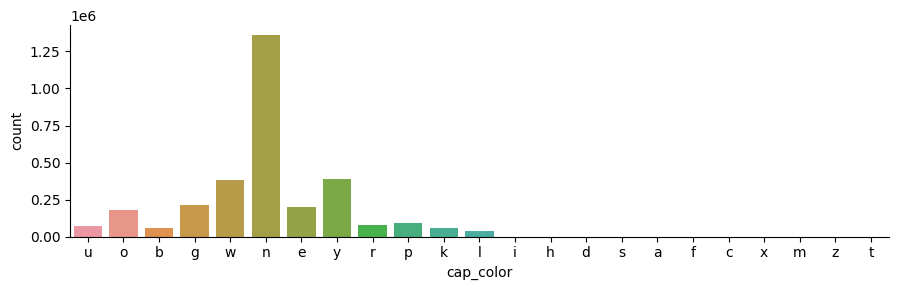

In [27]:
mdf = mdf[mdf.cap_color.isin(list("uobgwneyrpklihdsafcxmzt")+[np.nan])]
sns.catplot(mdf, kind="count", x ="cap_color", height=3, aspect=3)

In [28]:
mdf.shape #72 records removed

(3116745, 21)

In [29]:
mdf.does_bruise_or_bleed.value_counts()

does_bruise_or_bleed
f           2569572
t            547056
w                14
c                11
h                 9
a                 7
b                 7
x                 7
y                 7
k                 6
s                 6
e                 4
l                 4
p                 4
d                 4
g                 3
z                 3
o                 3
i                 2
n                 2
r                 1
has-ring          1
3.43              1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64

##### The column name suggests that it should be a Binary column. Checked on the official website as well, which confirms the same as well. Hence kept only t & f, as in True and False.

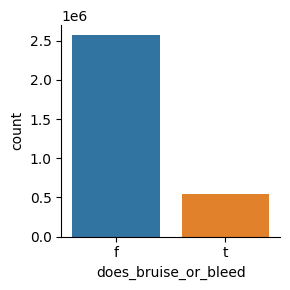

In [30]:
mdf = mdf[mdf.does_bruise_or_bleed.isin(list("tf"))]
sns.catplot(data = mdf, x='does_bruise_or_bleed', kind="count", height=3, aspect=1)

In [31]:
mdf.shape #117 records dropped

(3116628, 21)

In [ ]:
# list('abcdefghijklmnopqrstuvwxyz')
atoz = [chr(i) for i in range(ord('a'), ord('z')+1)]

def non_alpha_categories_removal(df, col, atoz):
    len_before = df.shape[0]
    df = df[df[col].isin(atoz+[np.nan])]
    len_after = df.shape[0]
    print(f"'{col}' processed. {len_before-len_after} records removed")
    sns.catplot(df, kind="count", x =col, height=2, aspect=3)
    return df


for col in ['gill_attachment', 'gill_spacing', 'gill_color',
            'stem_root', 'stem_surface', 'stem_color', 'veil_type', 
            'veil_color', 'has_ring', 'ring_type', 'spore_print_color', 'habitat']:
    mdf = non_alpha_categories_removal(mdf,col, atoz)

'gill_attachment' processed. 60 records removed
'gill_spacing' processed. 31 records removed
'gill_color' processed. 67 records removed
'stem_root' processed. 15 records removed
'stem_surface' processed. 47 records removed
'stem_color' processed. 40 records removed
'veil_type' processed. 3 records removed
'veil_color' processed. 3 records removed
'has_ring' processed. 2 records removed
'ring_type' processed. 27 records removed
'spore_print_color' processed. 11 records removed
'habitat' processed. 38 records removed


In [ ]:
mdf.shape

In [ ]:
display(mdf.season.value_counts())
mdf.season.value_counts().plot(figsize=(7,4), kind="pie", y=mdf.season.value_counts(),
                              autopct = "%1.01f%%", title="Distribution of Season", ylabel="")

#### //- SUMMARY from above:
1. ##### The **numerical columns have a lot of outliers.** Stem height column is normally distributed, while the others are right-skewed.
2. ##### The **target column is almost equally distributed** among Edible and Poisonous
3. ##### Most of the other **categorical columns had some garbage values** like numerical records or class name and so. So, have removed these garbage records **(about 700 rows dropped).** Still, *not all the alphabetical values are having remarkable spreads across respective columns.* So need to verify their correctness to decide whether to keep them or not.
4. ##### About **4 Mushrooms in every 5 don't have bruising.**
4. ##### There are **4 different seasons** spreading across the dataset, which are most probably **"Autumn", "Summer", "Winter", and "Spring".** --> Spring occurs the least among all.